# Analyzing Panic Attack Data: Lifestyle Influences, Potenital Triggers, and Symptoms

Gavin Kornitsky, Massimo Prag, Katrina Shonka, Sarah Hudson

In [1]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('panic_attack_dataset.csv')
pd.set_option('display.max_rows', None)
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


(array([60., 49., 46., 50., 40., 63., 68., 60., 61., 52.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

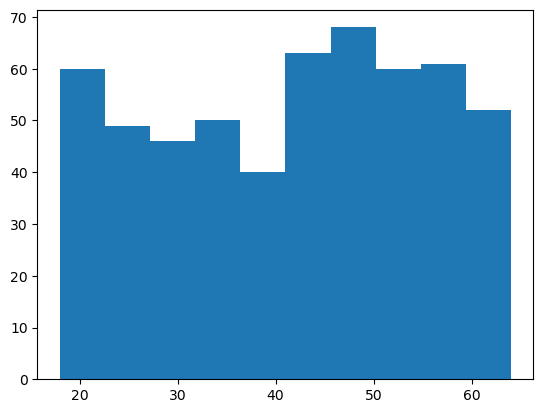

In [3]:
import matplotlib.pyplot as plt

df_f = df[df['Gender'] == 'Female']
plt.hist(df_f['Age'])

(array([59., 60., 45., 45., 47., 75., 56., 45., 45., 60.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

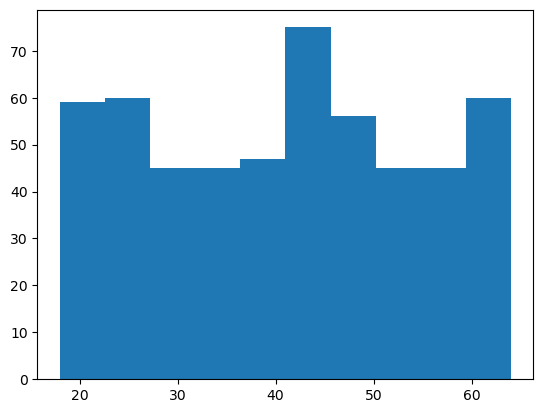

In [4]:
df_m = df[df['Gender'] == 'Male']
plt.hist(df_m['Age'])

In [5]:
df.columns

Index(['ID', 'Age', 'Gender', 'Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score'],
      dtype='object')

In [6]:
df['Medical_History'].unique()

array(['Anxiety', 'PTSD', 'Depression', 'None'], dtype=object)

In [7]:
# check for missing values
missing_vals = df.isnull().sum()
missing_vals # quicker than manually checking df for them

ID                        0
Age                       0
Gender                    0
Panic_Attack_Frequency    0
Duration_Minutes          0
Trigger                   0
Heart_Rate                0
Sweating                  0
Shortness_of_Breath       0
Dizziness                 0
Chest_Pain                0
Trembling                 0
Medical_History           0
Medication                0
Caffeine_Intake           0
Exercise_Frequency        0
Sleep_Hours               0
Alcohol_Consumption       0
Smoking                   0
Therapy                   0
Panic_Score               0
dtype: int64

the only column with missing values is Medical_History, and the missing values for that column just mean 
that those people dont have prexisting conditions, so we will be keeping those

In [8]:
# convert categorical data to numerical (Yes/No -> 1/0)
yes_no = ["Sweating", "Shortness_of_Breath", "Dizziness", "Trembling", "Smoking", "Therapy", "Chest_Pain", "Medication"]
df[yes_no] = df[yes_no].applymap(lambda x: 1 if x =="Yes" else 0) # assigns 1s to yes val and 0 to no
df[yes_no]

,Sweating,Shortness_of_Breath,Dizziness,Trembling,Smoking,Therapy,Chest_Pain,Medication
0,1,0,1,0,1,1,1,0
1,1,1,0,0,0,1,0,1
2,0,1,1,0,0,1,0,0
3,1,1,0,1,0,0,0,0
4,1,0,1,1,0,0,1,0
5,1,1,1,0,0,0,0,1
6,1,1,1,0,1,1,0,0
7,1,0,0,1,0,1,1,0
8,1,0,0,0,0,1,1,0
9,0,0,1,1,0,1,0,0


In [9]:
# removing non-binary individuals, making male=1, female=0
df = df[df["Gender"] != "Non-binary"].copy()
df.loc[:, "Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

/var/folders/yc/hqc52vms4zz84k_pcxr102bc0000gn/T/ipykernel_74768/174800511.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "Gender"] = df["Gender"].map({"Female": 0, "Male": 1})


In [10]:
# checking to see if gender is correctly mapped
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,0,9,5,Caffeine,134,1,0,1,...,0,Anxiety,0,2,3,6.4,5,1,1,5
1,2,46,1,8,9,Stress,139,1,1,0,...,0,PTSD,1,2,5,5.0,3,0,1,7
2,3,32,0,6,31,PTSD,141,0,1,1,...,0,Depression,0,4,0,8.3,8,0,1,7
3,4,60,1,5,20,Caffeine,109,1,1,0,...,1,Depression,0,3,3,5.3,8,0,0,1
5,6,38,1,0,44,Social Anxiety,154,1,1,1,...,0,Depression,1,1,4,4.8,6,0,0,8


### Standardizing the data
for numerical columns. not every numerical column needs to be standardized though

Columns where standardization is not neccessary:
- Age: Standardization would make it harder to understand, its unneccesary
- Panic_Attack_Frequency: its a count of attack per month, standardization would just complicate an easy stat
- Duration_Minutes: time in mins should be in raw format

Columns that need standardization:
- Heart_Rate: Can vary from 60-180 bpm, might dominate some smaller scale features
- Caffeine_Intake: smaller values, so it will benefit from standardization if for ex we are comparing heart rate to sleep
- Exercise_Frequency: weekly count (0-7)
- Sleep_Hours: varies between 3-10 hours so standardizing will help for comparing to caffeine and heart rate 
- Alcohol_Consumption: this one is so varied

In [11]:
# standardizing
numerical = ["Heart_Rate", "Caffeine_Intake", "Exercise_Frequency", "Sleep_Hours", "Alcohol_Consumption"]
# dtype is int64, but pandas needs it as float64 for StanardScaler
df[numerical] = df[numerical].astype("float64")

# standardization
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

### Feature Engineering: Panic Severity

In [12]:
# function for classifying panic severity
def panic_severity(score):
    if score <=3:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

# applying function to df
df.loc[:, "Panic_Severity"] = df["Panic_Score"].apply(panic_severity)

In [13]:
df = df.drop(columns=["ID"])

In [14]:
# final cleaned and preprocessed dataset :)
df.head()

,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,...,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score,Panic_Severity
0,56,0,9,5,Caffeine,0.579776,1,0,1,1,...,Anxiety,0,-0.305815,0.012020,-0.063514,0.202882,1,1,5,Medium
1,46,1,8,9,Stress,0.794274,1,1,0,0,...,PTSD,1,-0.305815,0.978938,-1.060073,-0.483504,0,1,7,High
2,32,0,6,31,PTSD,0.880074,0,1,1,0,...,Depression,0,0.853400,-1.438358,1.288959,1.232461,0,1,7,High
3,60,1,5,20,Caffeine,-0.492713,1,1,0,0,...,Depression,0,0.273793,0.012020,-0.846525,1.232461,0,0,1,Low
5,38,1,0,44,Social Anxiety,1.437768,1,1,1,0,...,Depression,1,-0.885423,0.495479,-1.202439,0.546075,0,0,8,High


### First Visualization: Sankey Diagram

In [15]:
# Sankey diagram functions in code block adapted from lecture notes in DS3500 course

import plotly.graph_objects as go
import pandas as pd

# pd.set_option('future.no_silent_downcasting', True)

def _code_mapping(df, src, targ):
    """ Map labels in src and targ columns to integers """
    # Get distinct labels
    labels = sorted(list(set(list(df[src]) + list(df[targ]))))

    # Get integer codes
    codes = list(range(len(labels)))

    # Create label to code mapping
    lc_map = dict(zip(labels, codes))

    # Substitute names for codes in dataframe
    df = df.replace({src: lc_map, targ: lc_map})
    return df, labels


def make_sankey(df, src, targ, vals=None, **kwargs):
    """ Generate a sankey diagram
    df - Dataframe
    src - Source column
    targ - Target column
    vals - Values column (optional)
    optional params: pad, thickness, line_color, line_width """

    if vals:
        values = df[vals]
    else:
        values = [1] * len(df[src])  # all 1

    df, labels = _code_mapping(df, src, targ)
    link = {'source': df[src], 'target': df[targ], 'value': values}

    pad = kwargs.get('pad', 50)
    thickness = kwargs.get('thickness', 50)
    line_color = kwargs.get('line_color', 'black')
    line_width = kwargs.get('line_width', 1)

    node = {'label': labels, 'pad': pad, 'thickness': thickness, 'line': {'color': line_color, 'width': line_width}}
    sk = go.Sankey(link=link, node=node)
    fig = go.Figure(sk)

    # pixels !
    width = kwargs.get('width', 800)
    height = kwargs.get('height', 400)
    fig.update_layout(
        autosize=False,
        width=width,
        height=height)

    return fig


def show_sankey(df, src, targ, vals=None, **kwargs):
    fig = make_sankey(df, src, targ, vals, **kwargs)
    fig.show()

### Grouped Bar Chart for Effects of Therapy and Medication

In [16]:
import altair as alt

# Create Therapy_Status and Medication_Status columns for labeling purposes using .apply()
df['Therapy_Status'] = df['Therapy'].apply(lambda x: 'Therapy' if x == 1 else 'No Therapy')
df['Medication_Status'] = df['Medication'].apply(lambda x: 'Medication' if x == 1 else 'No Medication')

# Create a combined Therapy/Medication status column
df['Status'] = df['Therapy_Status'] + ' & ' + df['Medication_Status']

# Group by and count each combined therapy/medication status and panic severity category
count_df = df.groupby(['Status', 'Panic_Severity']).size().reset_index(name='Count')

# Specify the order of Panic_Severity categories (x-axis)
severity_order = ['Low', 'Medium', 'High']

# Specify the order of Status categories (subplots)
status_order = ['No Therapy & No Medication', 'No Therapy & Medication', 
                'Therapy & No Medication', 'Therapy & Medication']

# Create the grouped bar chart with severity on the x-axis
chart = alt.Chart(count_df).mark_bar(color='blue').encode(
    x=alt.X('Panic_Severity:N', title='Panic Severity', sort=severity_order),
    y=alt.Y('Count:Q', title='Count of Panic Severity'),
    

    # Ensure the subplots follow the specified order
    column=alt.Column('Status:N', title='Therapy and Medication Status', sort=status_order)  
).properties(
    width=150,  
    height=400
).interactive()

chart

alt.Chart(...)

### Normalized Grouped Bar Chart for Effects of Therapy and Medication

In [24]:
import altair as alt

# Create Therapy_Status and Medication_Status columns for labeling purposes
df['Therapy_Status'] = df['Therapy'].apply(lambda x: 'Therapy' if x == 1 else 'No Therapy')
df['Medication_Status'] = df['Medication'].apply(lambda x: 'Medication' if x == 1 else 'No Medication')

# Create a combined Therapy/Medication status column
df['Status'] = df['Therapy_Status'] + ' & ' + df['Medication_Status']

# Group by and count each combined therapy/medication status and panic severity category
count_df = df.groupby(['Status', 'Panic_Severity']).size().reset_index(name='Count')

# Compute total counts per Therapy/Medication category
total_counts = count_df.groupby('Status')['Count'].transform('sum')

# Compute the percentage
count_df['Percentage'] = count_df['Count'] / total_counts

# Specify the order of Panic_Severity categories (x-axis)
severity_order = ['Low', 'Medium', 'High']

# Specify the order of Status categories (subplots)
status_order = ['No Therapy & No Medication', 'No Therapy & Medication', 
                'Therapy & No Medication', 'Therapy & Medication']


# Create the grouped bar chart with severity on the x-axis
chart = alt.Chart(count_df).mark_bar(color='#89CFF0').encode(
    x=alt.X('Panic_Severity:N', title='Panic Severity', sort=severity_order),
    y=alt.Y('Percentage:Q', title='Proportion within Therapy/Medication Category', axis=alt.Axis(format='%')),
    column=alt.Column('Status:N', title='Therapy and Medication Status', sort=status_order)  
).properties(
    width=150,  
    height=400
).configure_view(
    continuousWidth=150,
    continuousHeight=400
).configure_axis(
    labelFont='Roboto Mono',  # Apply Roboto Mono font to axis labels
    titleFont='Roboto Mono'   # Apply Roboto Mono font to axis titles
).configure_text(
    font='Roboto Mono'  # Apply Roboto Mono font to all text elements
).interactive()

chart


alt.Chart(...)

In [19]:
df.head()

,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,...,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score,Panic_Severity,Therapy_Status,Medication_Status,Status
0,56,0,9,5,Caffeine,0.579776,1,0,1,1,...,0.012020,-0.063514,0.202882,1,1,5,Medium,Therapy,No Medication,Therapy & No Medication
1,46,1,8,9,Stress,0.794274,1,1,0,0,...,0.978938,-1.060073,-0.483504,0,1,7,High,Therapy,Medication,Therapy & Medication
2,32,0,6,31,PTSD,0.880074,0,1,1,0,...,-1.438358,1.288959,1.232461,0,1,7,High,Therapy,No Medication,Therapy & No Medication
3,60,1,5,20,Caffeine,-0.492713,1,1,0,0,...,0.012020,-0.846525,1.232461,0,0,1,Low,No Therapy,No Medication,No Therapy & No Medication
5,38,1,0,44,Social Anxiety,1.437768,1,1,1,0,...,0.495479,-1.202439,0.546075,0,0,8,High,No Therapy,Medication,No Therapy & Medication


In [20]:
total_counts

0     234
1     234
2     234
3     304
4     304
5     304
6     220
7     220
8     220
9     328
10    328
11    328
Name: Count, dtype: int64

In [21]:
count_df

,Status,Panic_Severity,Count,Percentage
0,No Therapy & Medication,High,100,0.427350
1,No Therapy & Medication,Low,61,0.260684
2,No Therapy & Medication,Medium,73,0.311966
3,No Therapy & No Medication,High,122,0.401316
4,No Therapy & No Medication,Low,94,0.309211
5,No Therapy & No Medication,Medium,88,0.289474
6,Therapy & Medication,High,91,0.413636
7,Therapy & Medication,Low,56,0.254545
8,Therapy & Medication,Medium,73,0.331818
9,Therapy & No Medication,High,123,0.375000


In [22]:
symptom_df = df[['Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling']]

symptom_df.head()

,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling
0,1,0,1,1,0
1,1,1,0,0,0
2,0,1,1,0,0
3,1,1,0,0,1
5,1,1,1,0,0


### Creation of CSV for Stacked Bar Chart for Proportions of Yes/No for Each Symptom

In [23]:
import pandas as pd
from collections import Counter

symptom_df = df[['Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling']]

# Flatten the dataset into (symptom, response) pairs
symptom_responses = [(col, response) for col in symptom_df.columns for response in symptom_df[col]]

# Count occurrences of each (symptom, response) pair
response_counts = Counter(symptom_responses)


# Convert to DataFrame
symptom_data = pd.DataFrame(response_counts.items(), columns=["Symptom - Response", "Count"])
symptom_data["Symptom - Response"] = symptom_data["Symptom - Response"].apply(lambda x: f"{x[0]} - {x[1]}")

# Sort and display the final DataFrame
symptom_data = symptom_data.sort_values(by="Symptom - Response").reset_index(drop=True)
print(symptom_data)


        Symptom - Response  Count
0           Chest_Pain - 0    655
1           Chest_Pain - 1    431
2            Dizziness - 0    522
3            Dizziness - 1    564
4  Shortness_of_Breath - 0    410
5  Shortness_of_Breath - 1    676
6             Sweating - 0    338
7             Sweating - 1    748
8            Trembling - 0    549
9            Trembling - 1    537
